In [1]:
import matplotlib.pyplot as plt
import random as rn
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Input, Activation, Flatten
from keras.utils import np_utils
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_data = 'data/train.p'
test_data = 'data/test.p'

with open(train_data, 'rb') as f:
    train = pickle.load(f)

with open(test_data, 'rb') as f:
    test = pickle.load(f)

In [3]:
X_train, X_val, Y_train, Y_val = train_test_split(train['features'], train['labels'], test_size=0.3, random_state=0)
X_test, Y_test = test['features'], test['labels']

n_train = X_train.shape[0]
n_val = X_val.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1], X_train.shape[2]
n_channels = X_train.shape[3]
n_classes = np.unique(train['labels']).size

print('Train data size:\t\t\t', n_train)
print('Validation data size:\t\t\t', n_val)
print('test data size:\t\t\t\t', n_test)
print('Image shape:\t\t\t\t', image_shape)
print('Number of color channels in image:\t', n_channels)
print('Number of classes:\t\t\t', n_classes)

Train data size:			 27446
Validation data size:			 11763
test data size:				 12630
Image shape:				 (32, 32)
Number of color channels in image:	 3
Number of classes:			 43


In [4]:
def normalize(arr):
    arr = arr.astype('float32')
    return (arr - np.mean(arr))/np.std(arr)

X_train_norm = normalize(X_train)
X_val_norm = normalize(X_val)
X_test_norm = normalize(X_test)

def print_info(st, arr_1, arr_2):
    print('{} Data: Before normalization : type: {}, mean: {}, std: {}. After processing, type: {}, mean: {}, std: {}'. format(st, arr_1.dtype, round(np.mean(arr_1),2), round(np.std(arr_1),2), arr_2.dtype, round(np.mean(arr_2),2), round(np.std(arr_2),2)))

print_info('Train', X_train, X_train_norm)
print_info('Valdation', X_val, X_val_norm)
print_info('Test', X_test, X_test_norm)

Train Data: Before normalization : type: uint8, mean: 82.54, std: 68.96. After processing, type: float32, mean: 0.0, std: 1.0
Valdation Data: Before normalization : type: uint8, mean: 82.95, std: 69.22. After processing, type: float32, mean: -0.0, std: 1.0
Test Data: Before normalization : type: uint8, mean: 82.15, std: 68.74. After processing, type: float32, mean: -0.0, std: 1.0


In [5]:
def make_categorical(arr):
    return np_utils.to_categorical(arr, n_classes)

Y_train_cat = make_categorical(Y_train)
Y_val_cat = make_categorical(Y_val)
Y_test_cat = make_categorical(Y_test)

In [6]:
trc = rn.sample(range(n_test), 16)

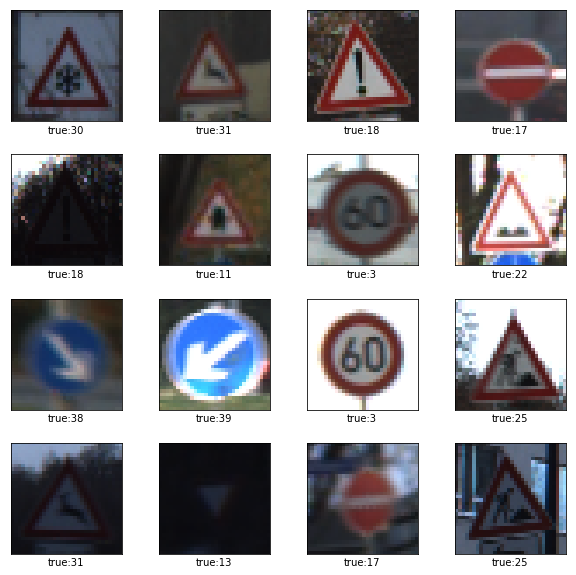

In [7]:
def plot_images(arr_1, arr_2, pred=False):
    fig, axes = plt.subplots(4, 4, figsize=(10,10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        if pred == False:
            ax.imshow(arr_1[trc[i]])
            ax.set_xlabel('true:{}'.format(arr_2[trc[i]]))
        else:
            ax.imshow(arr_1[trc[i]])
            ax.set_xlabel('true:{}, pred:{}'.format(arr_2[trc[i]], pred[trc[i]]))
        ax.set_xticks([])
        ax.set_yticks([])
        
plot_images(X_train, Y_train)

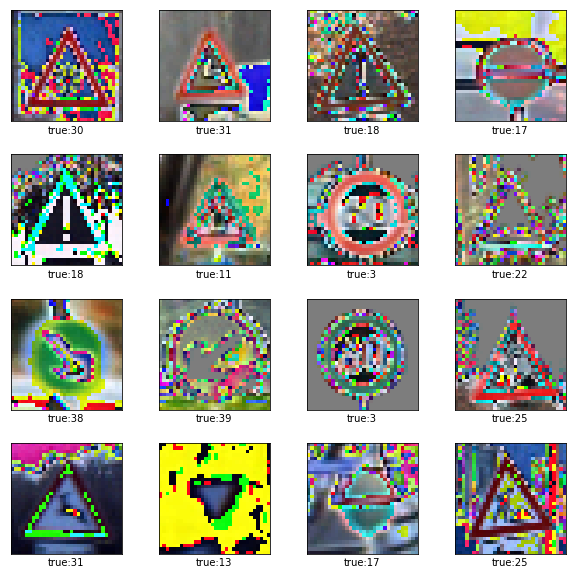

In [8]:
plot_images(X_train_norm, Y_train)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu', input_shape=(32*32*3,)))
model.add(Dense(43, activation='softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dense_2 (Dense)              (None, 43)                5547      
Total params: 3,692,971
Trainable params: 3,692,971
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_norm, Y_train_cat, batch_size=64, epochs=20, verbose=1, validation_data=(X_val_norm, Y_val_cat))

Train on 27446 samples, validate on 11763 samples
Epoch 1/20
27446/27446 [==============================] - 247s - loss: 1.2907 - acc: 0.6869 - val_loss: 0.4126 - val_acc: 0.8889
Epoch 2/20
15808/27446 [================>.............] - ETA: 117s - loss: 0.2797 - acc: 0.9277